**<h1>Business Understanding</h1>**

**<h3>Problem</h3>**

The problem that we aim to solve is the accurate forecasting of a movie's success based on various features like cast, crew, budget, revenue, release dates, and more. This solution is significant because it allows movie studios and production companies to make informed decisions, optimize investments, mitigate risks, and enhance audience satisfaction by predicting a movie's success accurately. Solving this problem is crucial as it enables efficient resource management, better project selection, and improved marketing strategies within the entertainment industry. By contributing a predictive model that leverages data-driven insights, this approach can drive greater profitability and audience engagement. The results obtained from this predictive model can be viably used to guide decision-making processes related to movie production, marketing strategies, and resource allocation in the entertainment industry.

**<h3> Dataset </h3>**

We are using a dataset from Kaggle titled "Millions of Movies." It is an excellent resource for movie analysis and prediction due to its comprehensive coverage and dynamic nature. It encompasses about a million movies, spanning from the 1900s to the present day, providing a rich historical context and a wide variety of data points for analysis. The dataset includes detailed information on cast, crew, plot keywords, budget, revenue, posters, release dates, and languages, which are crucial factors in predicting a movie's success. Additionally, its daily updates and enrichment with TMDB API ensure that the dataset remains current and reflective of the latest trends and releases in the movie industry. This level of detail and breadth makes it a valuable asset for building accurate and robust predictive models that can help studios and production companies make informed decisions

The dataset includes a blend of nominal and numeric features, such as movie ID, title, language, budget, languages, genres, production company, revenue and detailed information on cast and crew. It encompass a wide range of movies, providing a rich source of data for analysis. The inclusion of both quantitative data (e.g., budget, revenue) and qualitative data (e.g., plot keywords, genres) allows for a comprehensive approach to predicting movie success. This combination of breadth, depth, and timeliness makes it a valuable resource for developing a predictive model of movie success, as it captures a wide array of factors that can influence a movie's performance in the market.

Link to the dataset: <link>https://www.kaggle.com/datasets/akshaypawar7/millions-of-movies</link>

**<h3> Proposed Analytic Solution </h3>**

The proposed solution is the development of a machine learning-based model to predict the success of movies before their release. This solution is significant because it addresses the challenge of uncertainty in the movie industry by providing a data-driven approach to forecast profitability, which is crucial for making informed investment decisions. It can help studios and production companies to optimize their investments, reduce financial risks, and tailor marketing strategies to enhance audience satisfaction. By accurately predicting movie success, the model can contribute to the bigger picture by improving the efficiency of resource allocation, project selection, and marketing efforts in the entertainment industry. The results of the model can be used to guide decision-making processes at various stages of movie production and distribution

**<h1>Data Understanding and Exploration</h1>**

**<h3>1. Dataset Filtering</h3>**

The first step in the data understanding phase is to check for the availabilty of the target feature. Based on the proposed solution, the target feature should accurately measure the success of the movie. For that, we decided to derive our target feature which will be the ratio of the revenue and budget. Consequently, if the ratio obtained is greater than 2, meaning if the movie makes twice as much as its net cost of production, it would be considered a success. We plan to utilize 3 levels of success indicators low, medium and high as per the ratio.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('movies.csv',sep=r',', skipinitialspace=True)
df.head(20)

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...
2,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...
3,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,Super-Hero partners Scott Lang and Hope van Dy...,4425.387,Marvel Studios-Kevin Feige Productions,2023-02-15,200000000.0,475766228.0,125.0,Released,Witness the beginning of a new dynasty.,6.507,2811.0,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...,/qnqGbB22YJ7dSs4o6M7exTpNxPz.jpg,/m8JTwHFwX7I7JY5fPe4SjqejWag.jpg,823999-676841-868759-734048-267805-965839-1033...
4,677179,Creed III,Drama-Action,en,After dominating the boxing world Adonis Creed...,3994.342,Metro-Goldwyn-Mayer-Proximity Media-Balboa Pro...,2023-03-01,75000000.0,269000000.0,116.0,Released,You can't run from your past.,7.262,1129.0,Michael B. Jordan-Tessa Thompson-Jonathan Majo...,philadelphia pennsylvania-husband wife relatio...,/cvsXj3I9Q2iyyIo95AecSd1tad7.jpg,/5i6SjyDbDWqyun8klUuCxrlFbyw.jpg,965839-267805-943822-842942-1035806-823999-107...
5,385687,Fast X,Action-Crime-Thriller,en,Over many missions and against impossible odds...,3583.861,Universal Pictures-Original Film-One Race-Perf...,2023-05-17,340000000.0,704709660.0,142.0,Released,The end of the road begins.,7.275,3694.0,Vin Diesel-Michelle Rodriguez-Tyrese Gibson-Lu...,sequel-revenge-racing-family-cliffhanger-cars,/fiVW06jE7z9YnO4trhaMEdclSiC.jpg,/4XM8DUTQb3lhLemJC51Jx4a2EuA.jpg,19603-445954-781009-603692-697843-502356-29861...
6,614479,Insidious: The Red Door,Horror-Mystery-Thriller,en,To put their demons to rest once and for all J...,3512.648,Blumhouse Productions-Stage 6 Films-Screen Gem...,2023-07-05,16000000.0,175582093.0,107.0,Released,It ends where it all began.,6.750,564.0,Ty Simpkins-Patrick Wilson-Sinclair Daniel-Ros...,sequel-demon-franchise-insidious-supernatural ...,/azTC5osYiqei1ofw6Z3GmUrxQbi.jpg,/i2GVEvltEu3BXn5crBSxgKuTaca.jpg,681435-644937-448085-980848-1101547-988355-561...
7,646389,Plane,Action-Adventure-Thriller,en,After a heroic job of successfully landing his...,2618.646,MadRiver Pictures-Di Bonaventura Pictures-G-BA...,2023-01-12,25000000.0,51000000.0,107.0,Released,Survive together or die alone.,6.901,785.0,Gerard Butler-Mike Colter-Yoson An-Tony Goldwy...,pilot-airplane-philippines-held hostage-plane ...,/qi9r5xBgcc9KTxlOLjssEbDgO0J.jpg,/9Rq14Eyrf7Tu1xk0Pl7VcNbNh1n.jpg,505642-758769-864692-631842-1058949-925943-758...
8,569094,Spider-Man: Across the

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722480 entries, 0 to 722479
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    722480 non-null  int64  
 1   title                 722474 non-null  object 
 2   genres                511978 non-null  object 
 3   original_language     722480 non-null  object 
 4   overview              604113 non-null  object 
 5   popularity            722480 non-null  float64
 6   production_companies  337256 non-null  object 
 7   release_date          670592 non-null  object 
 8   budget                722480 non-null  float64
 9   revenue               722480 non-null  float64
 10  runtime               688110 non-null  float64
 11  status                722480 non-null  object 
 12  tagline               108313 non-null  object 
 13  vote_average          722480 non-null  float64
 14  vote_count            722480 non-null  float64
 15  

In [4]:
num_zeros = ((df['budget'] != 0) & (df['revenue'] != 0)).sum()
num_zeros

11190

We observe that the budget and revenue parameters combined, are only present for a total of 11190 records out of the total. Hence, we proceed with further data exploration on the filtered dataset where both the parameters are present.

In [5]:
nonzero_df = df[(df['budget'] != 0) & (df['revenue'] != 0)]

#saving the filtered dataset into a csv file
nonzero_df.to_csv('movies_filtered.csv', index=False)

In [6]:
#deleting the unfiltered dataframe and loading the newly created one
del df
df = pd.read_csv('movies_filtered.csv',sep=r',', skipinitialspace=True)
df.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...
2,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...
3,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,Super-Hero partners Scott Lang and Hope van Dy...,4425.387,Marvel Studios-Kevin Feige Productions,2023-02-15,200000000.0,475766228.0,125.0,Released,Witness the beginning of a new dynasty.,6.507,2811.0,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...,/qnqGbB22YJ7dSs4o6M7exTpNxPz.jpg,/m8JTwHFwX7I7JY5fPe4SjqejWag.jpg,823999-676841-868759-734048-267805-965839-1033...
4,677179,Creed III,Drama-Action,en,After dominating the boxing world Adonis Creed...,3994.342,Metro-Goldwyn-Mayer-Proximity Media-Balboa Pro...,2023-03-01,75000000.0,269000000.0,116.0,Released,You can't run from your past.,7.262,1129.0,Michael B. Jordan-Tessa Thompson-Jonathan Majo...,philadelphia pennsylvania-husband wife relatio...,/cvsXj3I9Q2iyyIo95AecSd1tad7.jpg,/5i6SjyDbDWqyun8klUuCxrlFbyw.jpg,965839-267805-943822-842942-1035806-823999-107...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11190 entries, 0 to 11189
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    11190 non-null  int64  
 1   title                 11190 non-null  object 
 2   genres                10692 non-null  object 
 3   original_language     11190 non-null  object 
 4   overview              10820 non-null  object 
 5   popularity            11190 non-null  float64
 6   production_companies  10060 non-null  object 
 7   release_date          10747 non-null  object 
 8   budget                11190 non-null  float64
 9   revenue               11190 non-null  float64
 10  runtime               11143 non-null  float64
 11  status                11190 non-null  object 
 12  tagline               8449 non-null   object 
 13  vote_average          11190 non-null  float64
 14  vote_count            11190 non-null  float64
 15  credits            

In [8]:
df['revenue_budget_ratio'] = df['revenue'] / df['budget']
#Checking central tendencies for the derived feature
mean_ratio = df['revenue_budget_ratio'].mean()
median_ratio = df['revenue_budget_ratio'].median()
range_ratio = df['revenue_budget_ratio'].max() - df['revenue_budget_ratio'].min()

print("Mean of revenue_budget_ratio:", mean_ratio)
print("Median of revenue_budget_ratio:", median_ratio)
print("Range of revenue_budget_ratio:", range_ratio)

Mean of revenue_budget_ratio: 25066.423088188672
Median of revenue_budget_ratio: 1.75
Range of revenue_budget_ratio: 100004216.0


The mean is evidently quite high than the median. The central tendencies are breaking probably because of outliers.

In [9]:
s_df = df.sort_values(by='revenue_budget_ratio', ascending=False)
s_df.head()


,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,...,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations,revenue_budget_ratio
10260,932428,Żyraf: Czas Zemsty,Horror,pl,NaN,0.6,NaN,NaN,1.0,100004215.0,...,Released,NaN,8.0,1.0,Fabian Żygadło-Antek Kaminski-Kacper Podczasia...,NaN,/1oGhKAwgzcQtOsA5nXZDzo7dhUL.jpg,/iyIxtg6EFEtKI3wNEhXs9ppP1Zb.jpg,NaN,100004215.0
10291,888201,GRU VS BOBUX MAN,NaN,en,NaN,0.6,NaN,NaN,1.0,90000000.0,...,Released,NaN,10.0,1.0,kakav420-kraccbak,NaN,NaN,/goC4BL2ae4YYTP8SHd3Yo6jIdgd.jpg,NaN,90000000.0
10006,698480,Amizade Desfeita,NaN,en,Blaire Mitch Jess Adam Ken and Val are in a ch...,0.6,NaN,NaN,1.0,64056643.0,...,Released,NaN,0.0,0.0,Blaire lily,NaN,NaN,NaN,NaN,64056643.0
9970,737626,A Isca e o Anzol,NaN,pt,NaN,0.6,NaN,NaN,1.0,9999999.0,...,Released,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,9999999.0
10689,535928,Wooden Slippers (2007),NaN,tl,The best movie of 2007,0.6,NaN,NaN,100.0,500000000.0,...,Released,Oh nang gewa mu?,10.0,1.0,NaN,NaN,/ejtnZGYX8NnQUHFMsPWqPtliFff.jpg,NaN,NaN,5000000.0


**<h3>Identifying the Data Scales, Data Types and Data domain for the features</h3>**

In [10]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")
    

Unique values in id: [615656 758323 667538 ... 512178 506977 501079]
Unique values in title: ['Meg 2: The Trench' "The Pope's Exorcist"
 'Transformers: Rise of the Beasts' ...
 '10 INSANE World Records OF ALL TIME' '100W Bulb' 'Chanel']
Unique values in genres: ['Action-Science Fiction-Horror' 'Horror-Mystery-Thriller'
 'Action-Adventure-Science Fiction' ... 'Thriller-Animation'
 'Animation-Fantasy-Comedy' 'Drama-Fantasy-Comedy']
Unique values in original_language: ['en' 'fi' 'ja' 'fr' 'es' 'zh' 'cn' 'hi' 'ko' 'te' 'ru' 'pt' 'it' 'de'
 'th' 'no' 'id' 'ar' 'da' 'nb' 'sv' 'tl' 'cs' 'el' 'pl' 'fa' 'uk' 'kn'
 'ro' 'he' 'ms' 'tr' 'ta' 'nl' 'hu' 'ml' 'vi' 'et' 'ca' 'af' 'ur' 'gl'
 'ku' 'bn' 'iu' 'sr' 'mr' 'sk' 'bm' 'pa' 'ne' 'gu' 'lt' 'az' 'si' 'km'
 'dz' 'xx' 'jv' 'ka' 'bg' 'am' 'ab' 'ht' 'dv' 'bs' 'sq' 'or' 'mn' 'lv'
 'lg' 'mo']
Unique values in overview: ['An exploratory dive into the deepest depths of the ocean of a daring research team spirals into chaos when a malevolent mining operati

In [11]:
features_df = pd.DataFrame(columns=['col_name', 'desc', 'data_type', 'scale(N,O,I,R)', 'domain', 'missing_values'])

# Iterate through columns of the original DataFrame and populate the column information DataFrame
for col in df.columns:
    col_info = {
        'col_name': col,
        'desc': '',  # Add description if available
        'data_type': df[col].dtype,
        'scale(N,O,I,R)': '',  
        'domain': df[col].unique(),  # Add domain if available
        'missing_values': df[col].isnull().sum()
    }
    features_df = pd.concat([features_df, pd.DataFrame([col_info])], ignore_index=True)
    
#Setting the data types
features_df.loc[features_df['data_type'] == 'object', 'data_type'] = 'String'
features_df.loc[features_df['col_name'] == 'release_date', 'data_type'] = 'Date'
features_df

#Setting the data scale
## ---------------data scale col---------------------------
scales = ['N', 'N', 'N', 'N', 'N', 'I', 'N', 'I', 'R', 'R', 'R', 'N', 'N', 'R', 'R', 'N', 'N', 'N', 'N', 'N','R']
features_df['scale(N,O,I,R)'] = scales
# N, O, I, R are Nominal, Ordinal, Interval, Ratio


#Setting the descriptions
## ---------------description col---------------------------
col_descriptions = {
    'id': 'Unique identifier for the movie',
    'title': 'Title of the movie',
    'genres': 'Genres associated with the movie',
    'original_language': 'Original language of the movie',
    'overview': 'Brief description of the movie',
    'popularity': 'TMDB lifetime popularity score',
    'production_companies': 'Companies involved in the production',
    'release_date': 'Date the movie was released',
    'budget': 'Amount of money spent to produce the movie',
    'revenue': 'Amount of money the movie generated',
    'runtime': 'Duration of the movie in minutes',
    'status': 'Current status of the movie (e.g., released, in production)',
    'tagline': 'Short phrase that captures the essence of the movie',
    'vote_average': 'Average user rating of the movie',
    'vote_count': 'Number of user ratings for the movie',
    'credits': 'Information about the cast and crew of the movie',
    'keywords': 'Keywords associated with the movie',
    'poster_path': 'File path for the movie poster image',
    'backdrop_path': 'File path for the movie backdrop image',
    'recommendations': 'Other movies recommended based on this one',
    'revenue_budget_ratio': 'Ratio of the movie\'s revenue to its budget'
}
features_df['desc'] = features_df['col_name'].map(col_descriptions)
features_df

,col_name,desc,data_type,"scale(N,O,I,R)",domain,missing_values
0,id,Unique identifier for the movie,int64,N,"[615656, 758323, 667538, 640146, 677179, 38568...",0
1,title,Title of the movie,String,N,"[Meg 2: The Trench, The Pope's Exorcist, Trans...",0
2,genres,Genres associated with the movie,String,N,"[Action-Science Fiction-Horror, Horror-Mystery...",498
3,original_language,Original language of the movie,String,N,"[en, fi, ja, fr, es, zh, cn, hi, ko, te, ru, p...",0
4,overview,Brief description of the movie,String,N,[An exploratory dive into the deepest depths o...,370
5,popularity,TMDB lifetime popularity score,float64,I,"[8763.998, 5953.227, 5409.104, 4425.387, 3994....",0
6,production_companies,Companies involved in the production,String,N,[Apelles Entertainment-Warner Bros. Pictures-d...,1130
7,release_date,Date the movie was released,Date,I,"[2023-08-02, 2023-04-05, 2023-06-06, 2023-02-1...",443
8,budget,Amount of money spent to produce the movie,float64,R,"[129000000.0, 18000000.0, 200000000.0, 7500000...",0
9,revenue,Amount of money the movie generated,float64,R,"[352056482.0, 65675816.0, 407045464.0, 4757662...",0


**<h3>2. Data Quality Report</h3>**

In [12]:
# FOR CONTINUOUS FEATURES
def percentage_missing(series):
    return (series.isna().sum() / len(series)) * 100

def calculate_quartiles(series):
    return series.quantile([0.25, 0.5, 0.75])
    
#For continuous features
cont_stats = []

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        feature_stats = {
            'Feature': column,
            'Desc': col_descriptions[column],
            'Count': df[column].count(),
            '% of Missing': percentage_missing(df[column]),
            'Card.': df[column].nunique(),
            'Min.': df[column].min(),
            'Q1': calculate_quartiles(df[column])[0.25],
            'Median': calculate_quartiles(df[column])[0.5],
            'Q3': calculate_quartiles(df[column])[0.75],
            'Max.': df[column].max(),
            'Mean': df[column].mean(),
            'Std. Dev.': df[column].std(),
            'Notes': ''
        }
        cont_stats.append(feature_stats)


cont_features_df = pd.DataFrame(cont_stats)

# Rounding numeric columns to two decimal places
numeric_cols = ['Count', '% of Missing', 'Card.', 'Min.', 'Q1', 'Median', 'Q3', 'Max.', 'Mean', 'Std. Dev.']
cont_features_df[numeric_cols] = cont_features_df[numeric_cols].round(2)

cont_features_df

,Feature,Desc,Count,% of Missing,Card.,Min.,Q1,Median,Q3,Max.,Mean,Std. Dev.,Notes
0,id,Unique identifier for the movie,11190,0.00,10824,5.0,11547.25,60187.50,426513.75,9.680510e+05,232707.05,2.830771e+05,
1,popularity,TMDB lifetime popularity score,11190,0.00,8276,0.6,2.62,10.47,19.54,8.764000e+03,22.90,1.506300e+02,
2,budget,Amount of money spent to produce the movie,11190,0.00,1832,1.0,740854.00,7000000.00,25000000.00,5.000000e+09,21772199.93,6.051739e+07,
3,revenue,Amount of money the movie generated,11190,0.00,8370,-12.0,502000.00,9054707.00,49113312.50,2.920357e+09,60044792.92,1.501535e+08,
4,runtime,Duration of the movie in minutes,11143,0.42,237,0.0,90.00,102.00,119.00,9.990000e+02,99.52,4.176000e+01,
5,vote_average,Average user rating of the movie,11190,0.00,1696,0.0,5.60,6.40,7.10,1.000000e+01,5.89,2.280000e+00,
6,vote_count,Number of user ratings for the movie,11190,0.00,3315,0.0,13.00,250.00,1243.75,3.326200e+04,1303.10,2.788740e+03,
7,revenue_budget_ratio,Ratio of the movie's revenue to its budget,11190,0.00,9040,-1.0,0.69,1.75,3.87,1.000042e+08,25066.42,1.413016e+06,


In [13]:
#FOR CATEGORICAL FEATURES

def second_mode(series):
    counts = series.value_counts()
    if len(counts) > 1:
        return counts.index[1]
    else:
        return None

def second_mode_freq(series):
    counts = series.value_counts()
    if len(counts) > 1:
        return counts.iloc[1]
    else:
        return None

def second_mode_percent(series):
    counts = series.value_counts(normalize=True)
    if len(counts) > 1:
        return counts.iloc[1] * 100
    else:
        return None


cat_stats = []

for column in df.columns:
    if not pd.api.types.is_numeric_dtype(df[column]):
        feature_stats = {
            'Feature': column,
            'Desc': col_descriptions[column],
            'Count': df[column].count(),
            '% of Missing': percentage_missing(df[column]),
            'Card.': df[column].nunique(),
            'Mode': df[column].mode().iloc[0],
            'Mode Freq.': df[column].value_counts().max(),
            'Mode %': (df[column].value_counts().max() / df[column].count()) * 100,
            '2nd Mode': second_mode(df[column]),
            '2nd Mode Freq.': second_mode_freq(df[column]),
            '2nd Mode Perc': second_mode_percent(df[column]),
            'Notes': ''
        }
        cat_stats.append(feature_stats)
        
cat_df = pd.DataFrame(cat_stats)

# Rounding numeric columns to two decimal places
numeric_cols = ['% of Missing', 'Card.', 'Mode Freq.','Mode %','2nd Mode Freq.', '2nd Mode Perc']
cat_df[numeric_cols] = cat_df[numeric_cols].round(2)

cat_df

,Feature,Desc,Count,% of Missing,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode Perc,Notes
0,title,Title of the movie,11190,0.00,10540,Midnight Sun,4,0.04,Rocky Horror Remade,3,0.03,
1,genres,Genres associated with the movie,10692,4.45,2032,Drama,780,7.30,Comedy,640,5.99,
2,original_language,Original language of the movie,11190,0.00,72,en,8406,75.12,hi,343,3.07,
3,overview,Brief description of the movie,10820,3.31,10468,A 1999 Indian horror film.,3,0.03,A new take on the origin story of THE FLASH! B...,3,0.03,
4,production_companies,Companies involved in the production,10060,10.10,7976,Metro-Goldwyn-Mayer,128,1.27,Warner Bros. Pictures,102,1.01,
5,release_date,Date the movie was released,10747,3.96,6391,2011-09-09,10,0.09,2011-09-09,10,0.09,
6,status,"Current status of the movie (e.g., released, i...",11190,0.00,6,Released,11171,99.83,In Production,9,0.08,
7,tagline,Short phrase that captures the essence of the ...,8449,24.50,8268,Based on a true story.,4,0.05,"This is an abomination creation of hard work, ...",3,0.04,
8,credits,Information about the cast and crew of the movie,10753,3.91,10383,Taylor Nikides,13,0.12,Rick Jones,7,0.07,
9,keywords,Keywords associated with the movie,9300,16.89,8790,wrestling-pro wrestling-female wrestler,65,0.70,woman director,49,0.53,


**<h3>3. Visualizations</h3>**

**<h4>A) Categorical Features</h4>**

Only some categorical features are fit to be displayed in the bar plots due to a variety of reasons such as:
1. Very high cardinality for a few features such as title, credits etc.
2. Irrelevant information such as poster path, title, etc

We dealt with the release date feature by extracting out the year and then binning it into 5-year intervals. 'Genres' also had high cardinality, but since its is relevant feature, we just account for the top 30 genres that occur in the data

In [14]:
import matplotlib.pyplot as plt

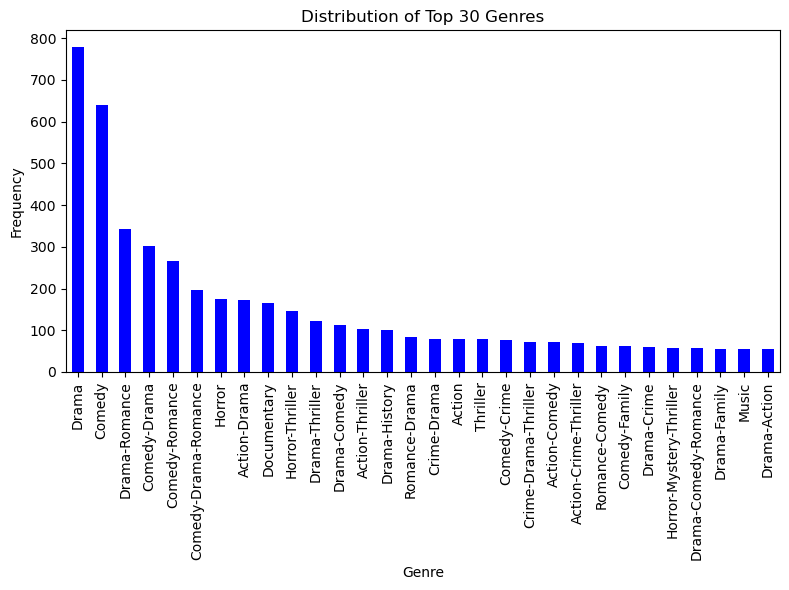

In [15]:
genre_counts = df['genres'].str.split(',').explode().value_counts()

# Get the top 30 genres
top_genres = genre_counts.nlargest(30).index

# Create the barplot
fig, ax = plt.subplots(figsize=(8, 6))
genre_counts[top_genres].plot(kind='bar', color='blue', ax=ax)

# Set the title, axis labels, and rotate the x-axis labels
ax.set_title('Distribution of Top 30 Genres')
ax.set_xlabel('Genre')
ax.set_ylabel('Frequency')
ax.tick_params(axis='x', rotation=90)

# Adjust the layout
plt.tight_layout()
plt.show()

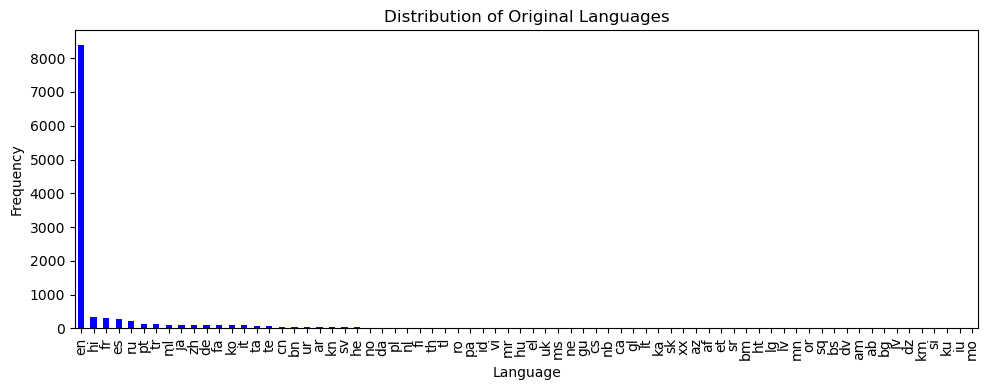

In [16]:
# Get the value counts for the 'original_language' column
lang_counts = df['original_language'].value_counts()

# Create the barplot
fig, ax = plt.subplots(figsize=(10, 4))
lang_counts.plot(kind='bar', color='blue', ax=ax)

# Set the title, axis labels, and rotate the x-axis labels
ax.set_title('Distribution of Original Languages')
ax.set_xlabel('Language')
ax.set_ylabel('Frequency')
ax.tick_params(axis='x', rotation=90)

# Adjust the layout
plt.tight_layout()
plt.show()

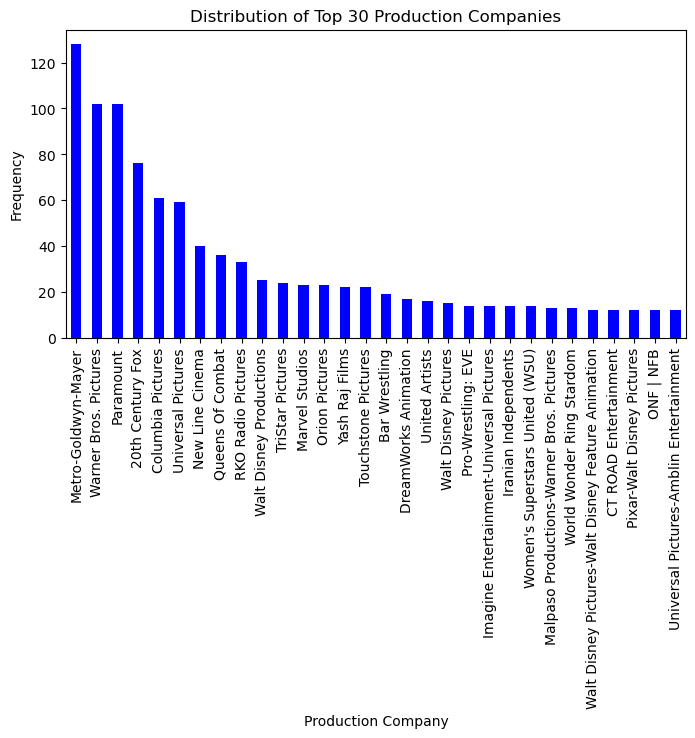

In [17]:
pc_counts = df['production_companies'].str.split(',').explode().value_counts()

# Get the top 30 production companies
top_pc = pc_counts.nlargest(30).index

# Create the barplot
fig, ax = plt.subplots(figsize=(8, 4))
pc_counts[top_pc].plot(kind='bar', color='blue', ax=ax)

# Set the title, axis labels, and rotate the x-axis labels
ax.set_title('Distribution of Top 30 Production Companies')
ax.set_xlabel('Production Company')
ax.set_ylabel('Frequency')
ax.tick_params(axis='x', rotation=90)



plt.show()

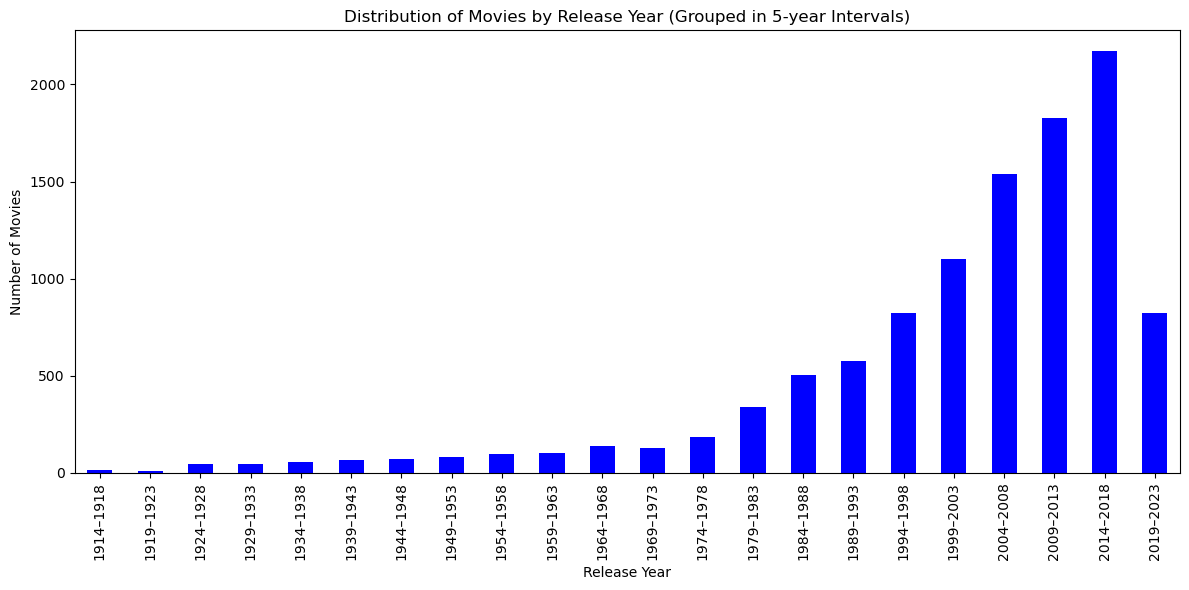

In [18]:
df['release_date'] = pd.to_datetime(df['release_date']).dt.year
df = df.rename(columns={'release_date': 'release_year'}) #Changing the column name to release year


# Define the start and end years, and the interval
start_year = 1914
end_year = 2024
interval = 5

# Create the bins for the year ranges
bins = list(range(start_year, end_year + 1, interval))
labels = [f"{start}–{start + interval - 1}" for start in bins[:-1]]

# Categorize the years into the bins
release_year_group = pd.cut(df['release_year'], bins=bins, labels=labels, include_lowest=True)

# Get the count of movies per release year group
year_group_counts = release_year_group.value_counts().sort_index()

# Create the barplot
fig, ax = plt.subplots(figsize=(12, 6))
year_group_counts.plot(kind='bar', color='blue', ax=ax)

# Set the title, axis labels, and rotate the x-axis labels
ax.set_title('Distribution of Movies by Release Year (Grouped in 5-year Intervals)')
ax.set_xlabel('Release Year')
ax.set_ylabel('Number of Movies')
ax.tick_params(axis='x', rotation=90)

# Adjust the layout
plt.tight_layout()
plt.show()


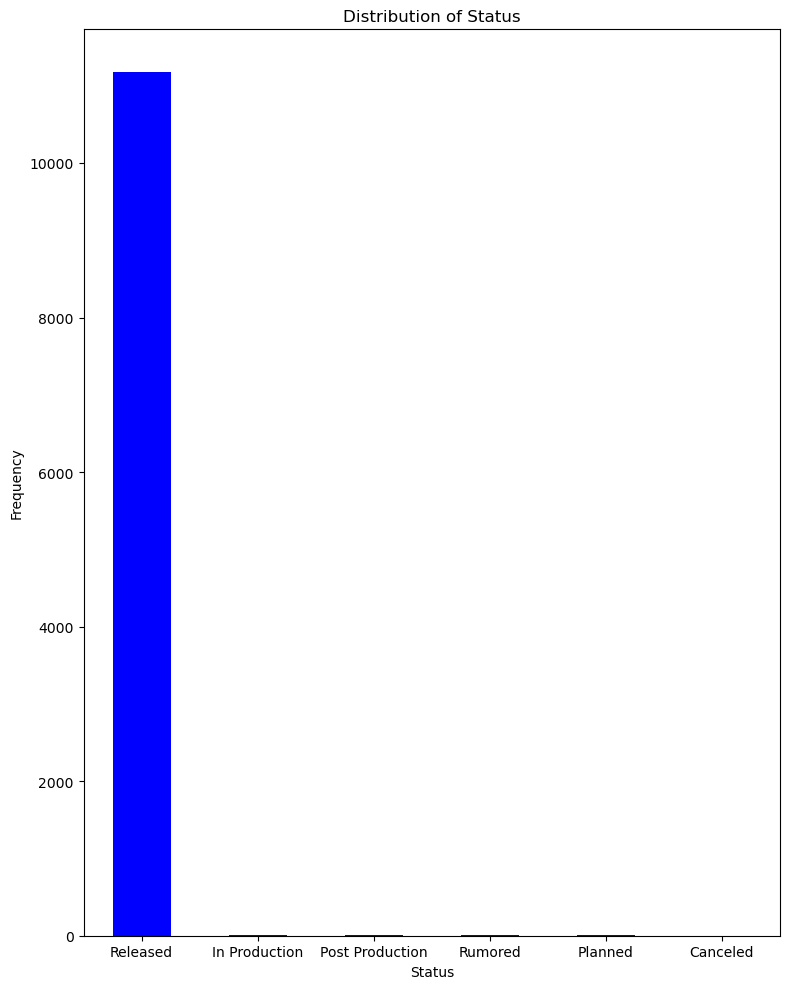

In [19]:
# Get the value counts for the 'status' column
st_counts = df['status'].value_counts()

# Create the barplot
fig, ax = plt.subplots(figsize=(8, 10))
st_counts.plot(kind='bar', color='blue', ax=ax)

# Set the title, axis labels, and rotate the x-axis labels
ax.set_title('Distribution of Status')
ax.set_xlabel('Status')
ax.set_ylabel('Frequency')
ax.tick_params(axis='x', rotation = 0)

# Adjust the layout
plt.tight_layout()
plt.show()

**<h4>B) Continuous Features</h4>**

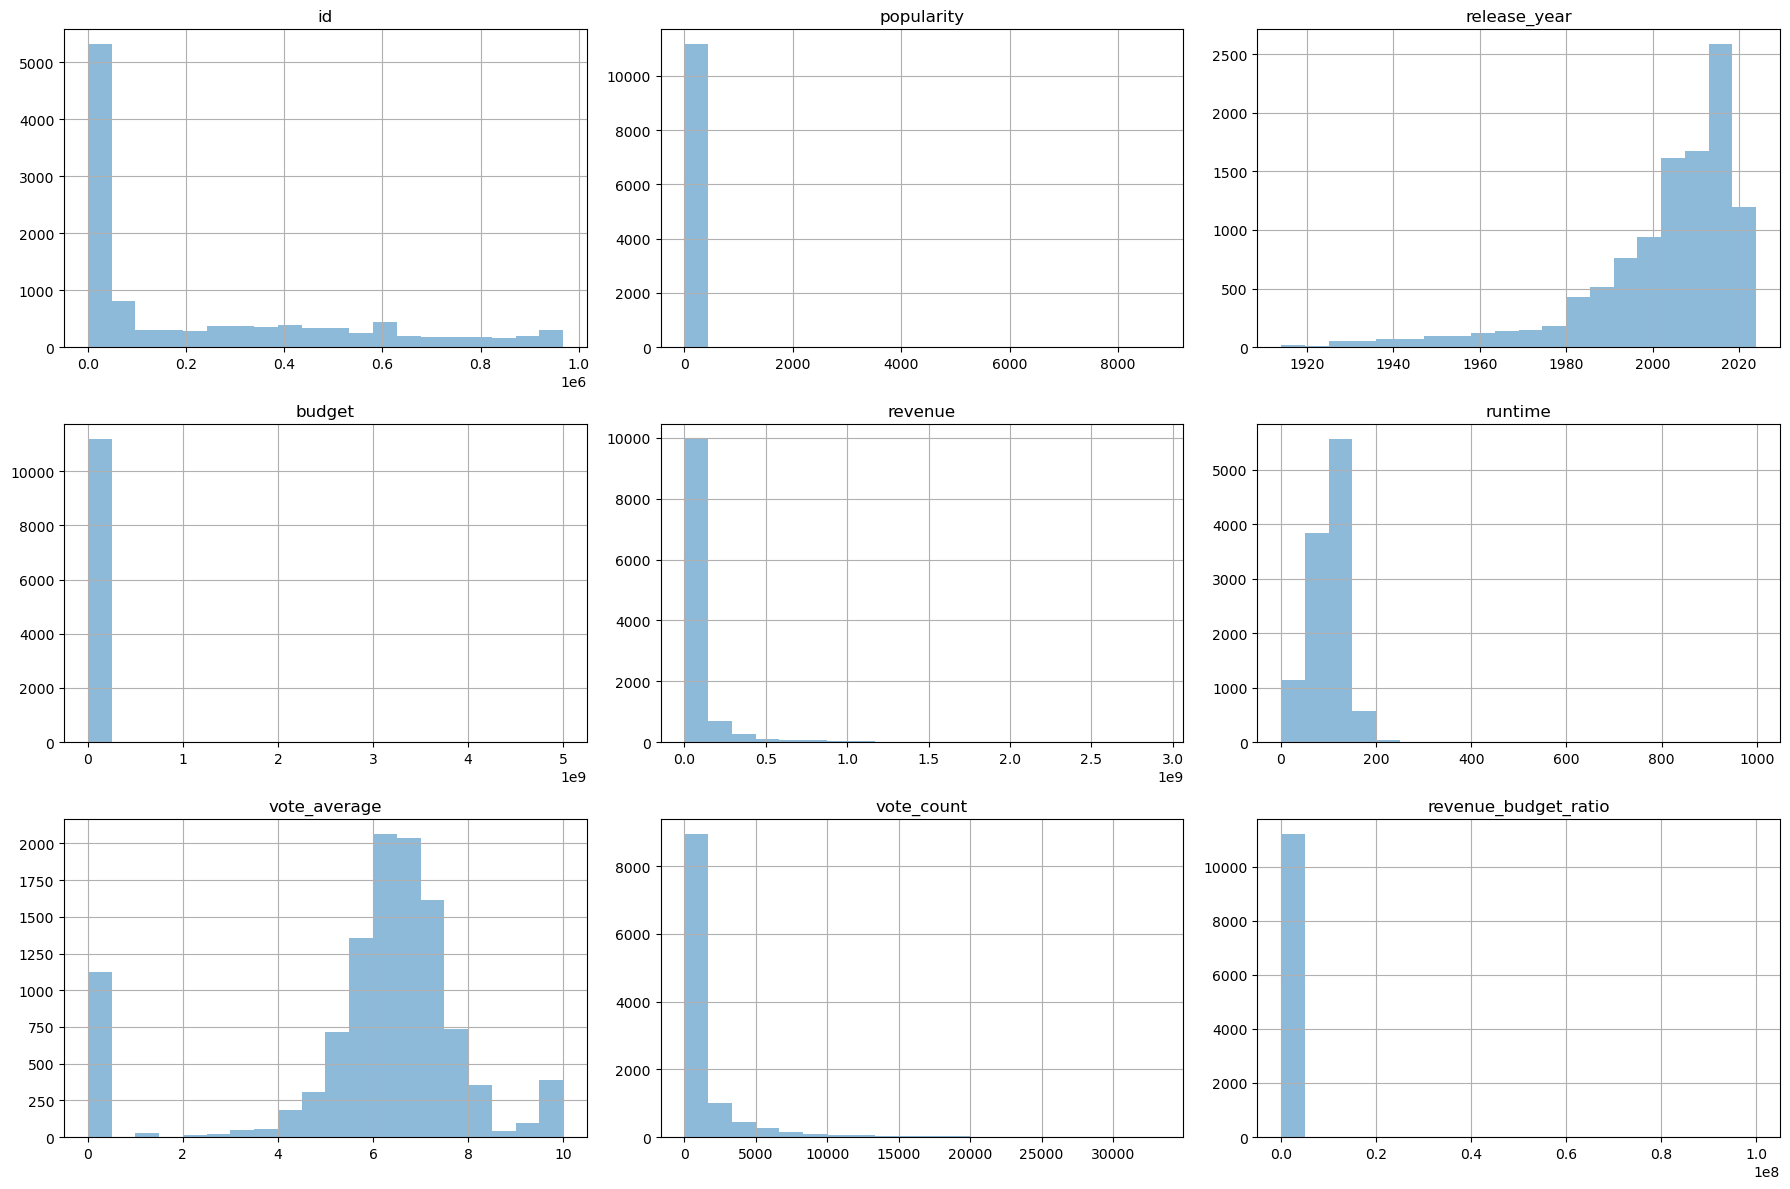

In [20]:
continuous_vars = df.select_dtypes(exclude='object').columns

# Calculate the no. of rows and columns needed
num_vars = len(continuous_vars)
num_cols = 3 # No. of histograms per row
num_rows = (num_vars + num_cols - 1) // num_cols  # no. of rows needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 4 * num_rows))
axes = axes.flatten()
for i, var in enumerate(continuous_vars):
    df[var].hist(ax=axes[i], bins=20, alpha=0.5)
    axes[i].set_title(var)

for j in range(num_vars, num_rows * num_cols):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

**<h3>Outlier Identification and Handling</h3>**

Outliers for id
Number of Outliers= 0
Lower Bound= -610902.50
Upper Bound= 1048963.50


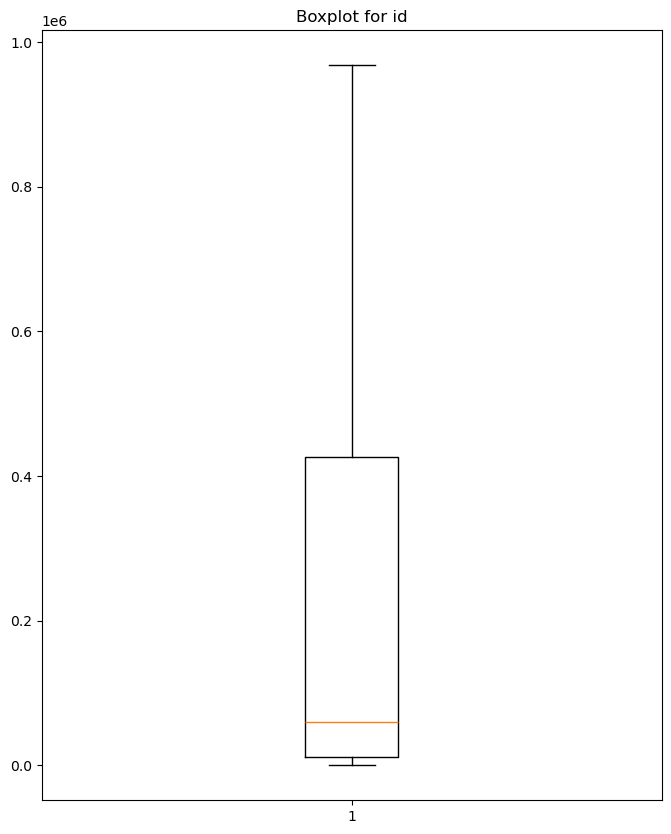

Outliers for popularity
Number of Outliers= 824
Lower Bound= -22.75
Upper Bound= 44.91
Outliers =
 0      8763.998
1      5953.227
2      5409.104
3      4425.387
4      3994.342
         ...   
819      45.213
820      44.986
821      44.982
822      44.979
823      44.968
Name: popularity, Length: 824, dtype: float64


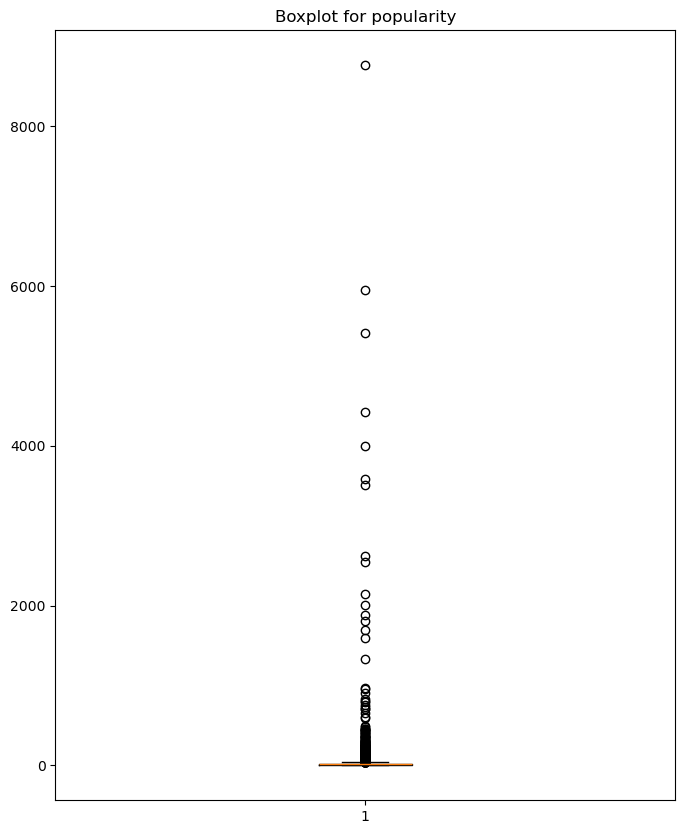

Outliers for budget
Number of Outliers= 1032
Lower Bound= -35647865.00
Upper Bound= 61388719.00
Outliers =
 0        1.290000e+08
2        2.000000e+08
3        2.000000e+08
4        7.500000e+07
5        3.400000e+08
             ...     
10312    1.000000e+08
10373    2.500000e+08
10444    5.000000e+09
10512    1.000000e+08
10560    1.000000e+08
Name: budget, Length: 1032, dtype: float64


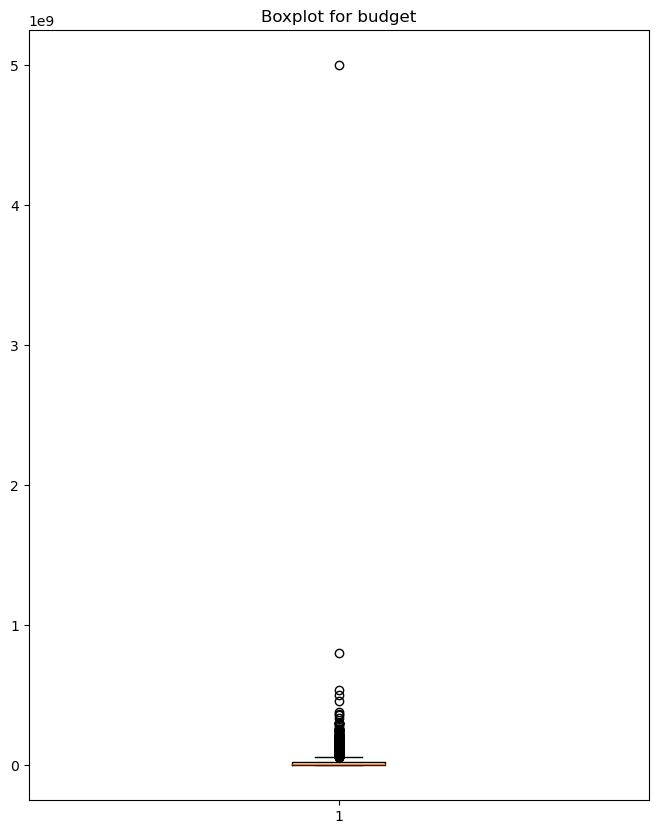

Outliers for revenue
Number of Outliers= 1452
Lower Bound= -72414968.75
Upper Bound= 122030281.25
Outliers =
 0        3.520565e+08
2        4.070455e+08
3        4.757662e+08
4        2.690000e+08
5        7.047097e+08
             ...     
10373    5.000000e+08
10560    5.000000e+08
10689    5.000000e+08
10704    1.000000e+09
10781    1.956730e+08
Name: revenue, Length: 1452, dtype: float64


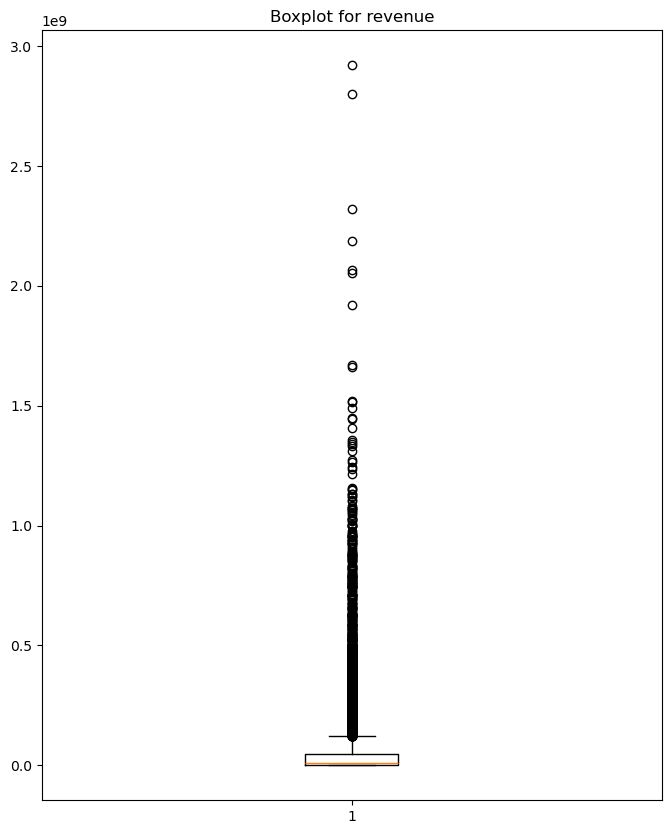

Outliers for runtime
Number of Outliers= 1448
Lower Bound= 46.50
Upper Bound= 162.50
Outliers =
 24       181.0
26       170.0
32       164.0
33       206.0
56       192.0
         ...  
11175      3.0
11182    165.0
11183     46.0
11184      9.0
11186      8.0
Name: runtime, Length: 1448, dtype: float64


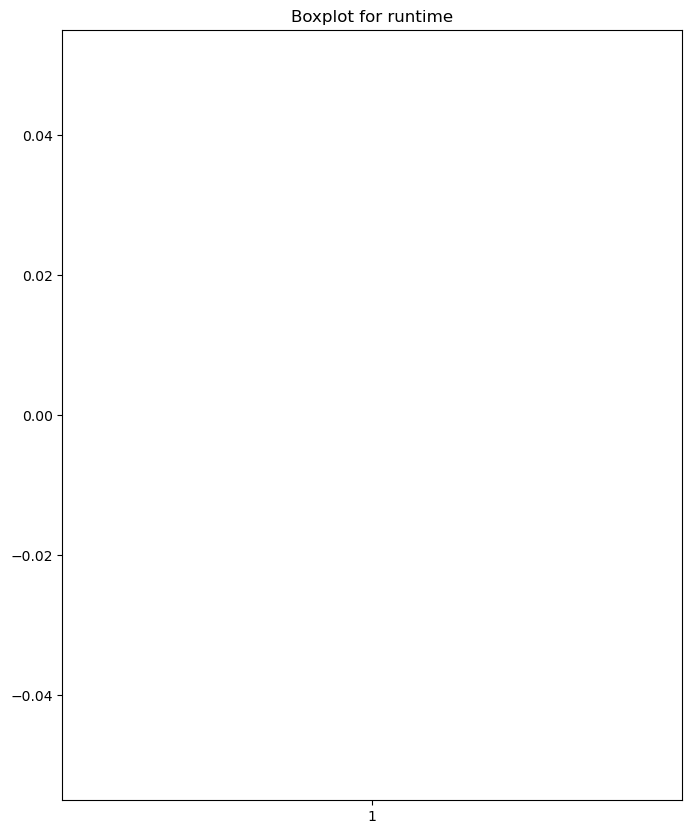

Outliers for vote_average
Number of Outliers= 1616
Lower Bound= 3.35
Upper Bound= 9.35
Outliers =
 1929     2.80
3097     3.30
3466     0.00
3959     3.20
4883     3.24
         ... 
11183    0.00
11185    0.00
11186    0.00
11188    0.00
11189    0.00
Name: vote_average, Length: 1616, dtype: float64


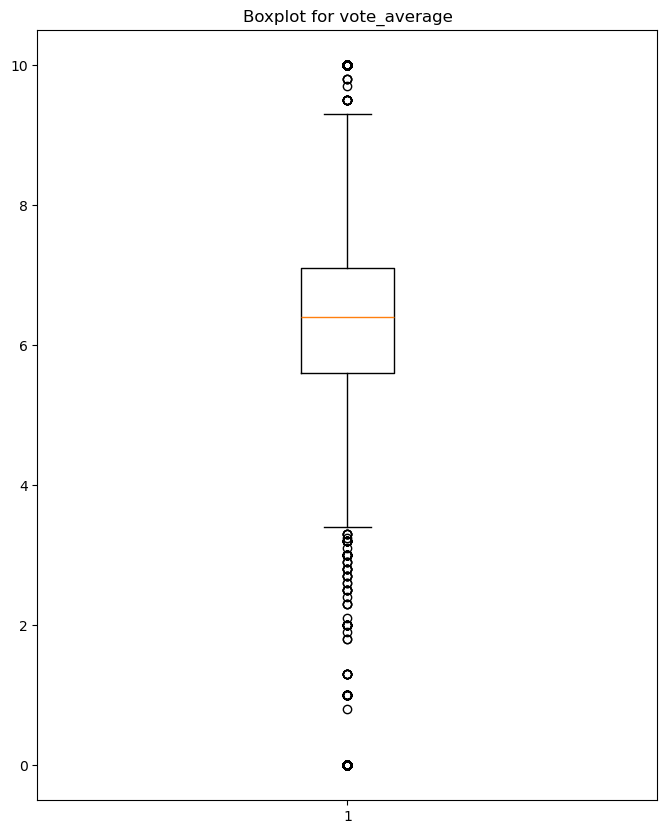

Outliers for vote_count
Number of Outliers= 1333
Lower Bound= -1833.12
Upper Bound= 3089.88
Outliers =
 5        3694.0
18       5759.0
24       5461.0
26       4159.0
27       6262.0
         ...   
8557    11844.0
8593     7378.0
8825     3365.0
8947    10305.0
9604     3781.0
Name: vote_count, Length: 1333, dtype: float64


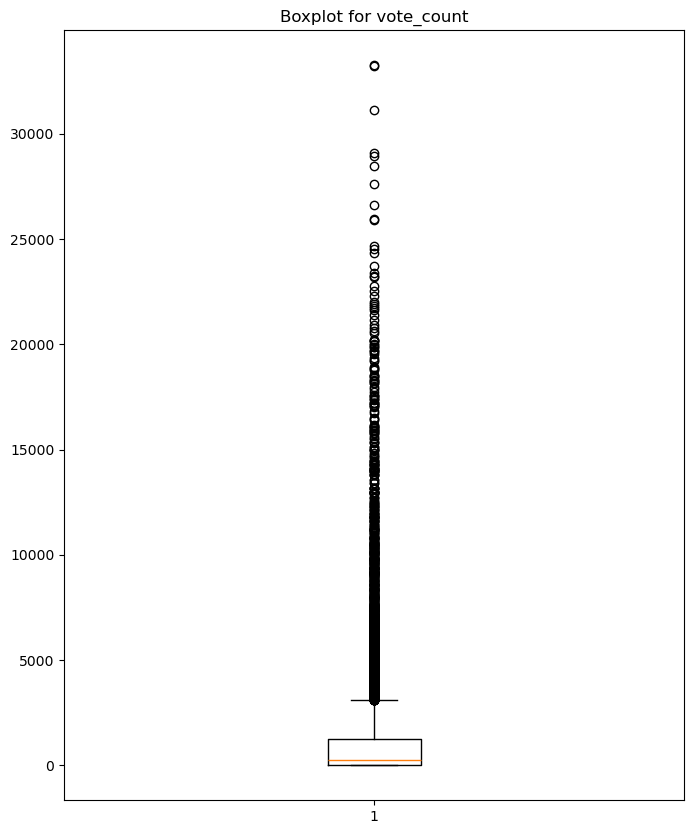

Outliers for revenue_budget_ratio
Number of Outliers= 1155
Lower Bound= -4.08
Upper Bound= 8.64
Outliers =
 6         10.973881
24         9.514693
27        13.557253
28         9.434141
34         9.969920
            ...    
11149     10.000000
11151     23.540926
11175     11.570000
11179    133.333333
11189     20.000000
Name: revenue_budget_ratio, Length: 1155, dtype: float64


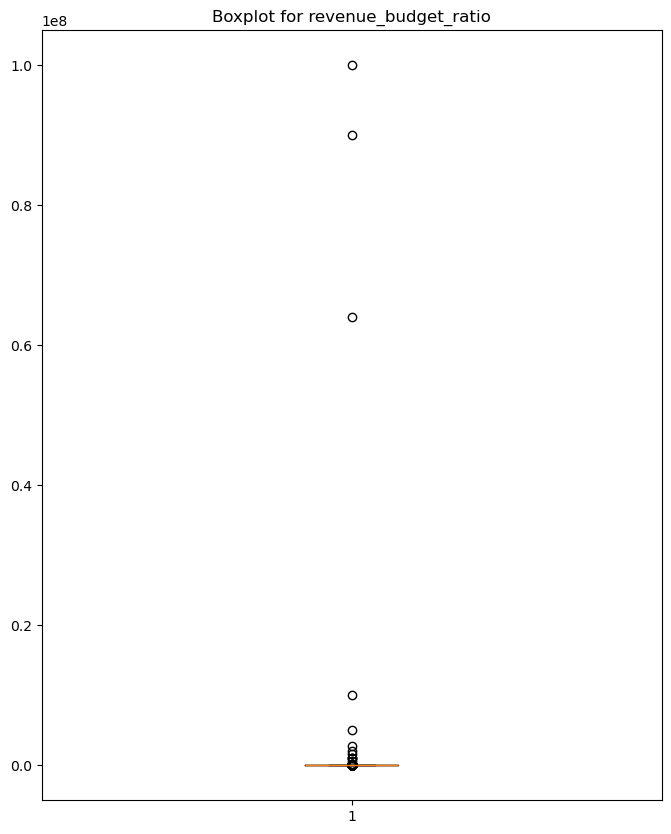

In [21]:
def find_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers, lower_bound, upper_bound, len(outliers)

for column in df.columns:
    if column != 'release_year' and pd.api.types.is_numeric_dtype(df[column]):
        outliers = find_outliers_iqr(column)
        outl, lb, ub, num_outl = find_outliers_iqr(column)
        print(f'Outliers for {column}')
        print(f'Number of Outliers= {num_outl}')
        print(f'Lower Bound= {lb:.2f}')
        print(f'Upper Bound= {ub:.2f}')
        if num_outl != 0:
            print(f'Outliers =\n {outl}')
        
        plt.figure(figsize=(8, 10))  
        plt.boxplot(df[column]) 
        plt.title(f'Boxplot for {column}')
        
               
        plt.show()

In [22]:
bounds = {
    'budget': (740854, 61388719),
    'revenue': (502000, 122030281.25),
    'vote_average': (3.35, 9.35),
    'vote_count' : (0,3089.88),
    'popularity' : (0, 45)
}

for column in ['budget', 'revenue', 'vote_average', 'vote_count','popularity']:
    lower_bound, upper_bound = bounds[column]
    
    # Replace outlying values with given upper or lower bounds
    updated_cells = sum((df[column] < lower_bound) | (df[column] > upper_bound))
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    
    # Reporting the number of updated cells 
    print(f'Number of updated cells in {column}: {updated_cells}')

Number of updated cells in budget: 3830
Number of updated cells in revenue: 4249
Number of updated cells in vote_average: 1616
Number of updated cells in vote_count: 1333
Number of updated cells in popularity: 820


<i>Since we applied clamp transformation to the 'budget' and 'revenue' columns, its also imperative to update the derived feature 'revenue_budget_ratio'.</i>

In [23]:
df['revenue_budget_ratio'] = df['revenue'] / df['budget']

**<h3>Handling Missing Values</h3>**

**<h4>Continuous Features</h4>**

The only continuous feature with missing values is "runtime" and we fix it by imputing with the mean.

In [24]:
mean_runtime = df['runtime'].mean()

df['runtime'].fillna(mean_runtime, inplace=True)


**<h4>Categorical Features</h4>**

We handle the missing values in genres, production companies, keywords and credits by using a missing indicator "unknown".

In [25]:
columns = ['genres', 'production_companies', 'keywords', 'credits']
for col in columns:
    df[col] = df[col].fillna('unknown')

In the case of release year, since the bar plot indicates that most movies are from the time frame 2008 to 2018, we impute the missing values with the median which is 2008.

In [26]:
median_rd = df['release_year'].median()

df['release_year'].fillna(median_rd, inplace=True)


**<h3>Normalization</h3>**

In [27]:
from sklearn.preprocessing import MinMaxScaler
print('vote_count')
print("VALUES BEFORE SCALING:")
print(df['vote_count'])
mm_scaler = MinMaxScaler(feature_range=(0, 10))

vals_vc = np.array(df['vote_count'].tolist()).reshape(-1,1)
vals_vc_scaled = mm_scaler.fit_transform(vals_vc)

#Put in data frame
df['vote_count'] = vals_vc_scaled
print("VALUES AFTER SCALING:")
print(df['vote_count'])

vote_count
VALUES BEFORE SCALING:
0        1365.0
1         545.0
2        1007.0
3        2811.0
4        1129.0
          ...  
11185       0.0
11186       0.0
11187       1.0
11188       0.0
11189       0.0
Name: vote_count, Length: 11190, dtype: float64
VALUES AFTER SCALING:
0        4.417647
1        1.763823
2        3.259026
3        9.097441
4        3.653864
           ...   
11185    0.000000
11186    0.000000
11187    0.003236
11188    0.000000
11189    0.000000
Name: vote_count, Length: 11190, dtype: float64


We normalized the vote count because it had a wide range of values with some very high and some very low values which might make the model biased.

**<h3>Transformations</h3>**

Here is a summary of transformations we applied to the original dataset:
1. We filtered the data by parameters of interest, in this case budget and revenue. We extracted the records with both of these values present.
2. We introduced a new feature "revenue_budget_ratio" which accounts for the success of movies. Next we plan to convert it to different labels.
3. We extracted the year the movie was released from the original feature release-date.
4. We applied clamp transformation to 'budget', 'revenue', 'vote_average', 'vote_count','popularity' features to handle the outliers.
5. We imputed the missing values in 'runtime' feature with its mean.
6. We handled the missing values in genres, production companies, keywords and credits by using a missing indicator "unknown".
7. We range-normalized vote count to avoid bias.
8. We dropped the features 'tagline', 'poster-path','backdrop-path','recommendations', and 'overview' because they had significant missing values and also do not contribute to the success predction model we proposed.


In [28]:
#saving the preprocessed dataset into a csv file
df.to_csv('movies_preprocessed.csv', index=False)
del df
df = pd.read_csv('movies_preprocessed-2.csv',sep=r',', skipinitialspace=True)
df['revenue_budget_ratio'] = df['revenue']/df['budget']
# List of features to drop
features_to_drop = ['tagline', 'poster_path', 'backdrop_path', 'recommendations', 'overview']

# # Dropping the specified features from the DataFrame
df.drop(features_to_drop, axis=1, inplace=True)
df

,id,title,genres,original_language,popularity,production_companies,release_year,budget,revenue,runtime,status,vote_average,vote_count,credits,keywords,revenue_budget_ratio
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,45.0,Apelles Entertainment-Warner Bros. Pictures-di...,2023,61388719,122030281.3,116.0,Released,7.079,4.417647,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,1.987829
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,45.0,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023,18000000,65675816.0,103.0,Released,7.433,1.763823,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,3.648656
2,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,45.0,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023,61388719,122030281.3,127.0,Released,7.340,3.259026,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,1.987829
3,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,45.0,Marvel Studios-Kevin Feige Productions,2023,61388719,122030281.3,125.0,Released,6.507,9.097441,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...,1.987829
4,677179,Creed III,Drama-Action,en,45.0,Metro-Goldwyn-Mayer-Proximity Media-Balboa Pro...,2023,61388719,122030281.3,116.0,Released,7.262,3.653864,Michael B. Jordan-Tessa Thompson-Jonathan Majo...,philadelphia pennsylvania-husband wife relatio...,1.987829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11185,576819,Active Shooter,Documentary-Crime,en,0.6,U.S. Department of Homeland Security,2017,740854,502000.0,90.0,Released,3.350,0.000000,Connor Patrick Griffin-Kristina Anderson-Dave ...,unknown,0.677596
11186,512178,10 INSANE World Records OF ALL TIME,unknown,en,0.6,unknown,2008,740854,502000.0,8.0,Released,3.350,0.000000,unknown,unknown,0.677596
11187,546976,Woman's Enemy,Comedy,fa,0.6,Pouya Film,2017,740854,502000.0,90.0,Released,6.500,0.003236,Sam Derakhshani-Bahare Kianafshar-Elnaz Habibi...,unknown,0.677596
11188,506977,100W Bulb,Drama-Crime,fa,0.6,sooreh co,2014,740854,502000.0,90.0,Released,3.350,0.000000,Mohsen Tanabande-Sare Bayat-Masoud Karamati-Po...,unknown,0.677596


**<h3>Feature Engineering</h3>**

In [29]:
dfpc = pd.read_excel('prod_c.xlsx')

# Print the first few rows of the DataFrame
dfpc.head()

,Production Companies,No. of Movies,Total Domestic Box Office,Total Worldwide Box Office
0,Warner Bros.,317,22902544655,53529008780
1,Columbia Pictures,293,22047420674,48355084422
2,Universal Pictures,326,21976224562,51074350610
3,Paramount Pictures,253,17787079135,38378433269
4,Walt Disney Pictures,170,17590430283,41948556062


In [30]:
def standardize_company_name(company_name):
    # Remove periods and convert to lowercase
    company_name = company_name.replace('.', '').lower()
    
    # Remove common words like 'productions', 'pictures', etc.
    company_name = company_name.replace('productions', '').replace('group', '').replace('feature', '').replace('pictures', '').replace('corp', '').replace('corporation', '').replace('network', '').replace('studios', '').replace('ltd', '').replace('animation', '').replace('movies', '').replace('entertianment', '').replace('films', '').replace(' film', '').replace('entertainment', '').replace('company', '').replace('production', '')

    company_name = company_name.strip()

    return company_name

#This function is to standardize the pc names by removing any extra words and periods.



In [31]:
dfpc['Production Companies'] = dfpc['Production Companies'].apply(standardize_company_name)

In [32]:
# Find rows where the 'Production Companies' column in dfpc contains '-'
rows_with_dash = dfpc[dfpc['Production Companies'].str.contains('-')]
# Extract the 'Production Companies' values from the selected rows
company_names = rows_with_dash['Production Companies'].tolist()

# Convert the list to a NumPy array
company_array = np.array(company_names)

#This is an array containing the names of all pc that have a '-' in their name.


In [33]:
#Standardizing original df
df['production_companies'] = df['production_companies'].apply(standardize_company_name)

In [34]:
def split_company_names(company_string, company_array):
    # Split the string by '-'
    parts = company_string.split('-')

    
    # Initialize an empty list to store the final company names
    companies = []
    
    # Temporary list to hold parts that may form a company name with '-'
    temp = []
    
    # Iterate over the parts
    for part in parts:
        # Add the current part to the temporary list
        temp.append(part)
        
        # Join the parts in the temporary list with '-' and check if it's in the company_array
        if '-'.join(temp) in company_array:
            # If it's a known company name, add it to the companies list and reset temp
            companies.append('-'.join(temp))
            temp = []
        elif len(temp) > 1 and '-'.join(temp[:-1]) in company_array:
            # If the previous parts form a known company name, add them to the companies list
            companies.append('-'.join(temp[:-1]))
            # Reset temp to the last part which did not match
            temp = [temp[-1]]
    
    # If there's any remaining part, add it as a company name
    if temp:
        for t in temp:
            companies.append(t)
    
    return companies


# Create a new column to store the split company names
df['production_companies'] = df['production_companies'].apply(lambda x: split_company_names(x, company_array))

#----------------- This function checks the company_array , and seperates the names of the pc's in the original df taking into consideration the '-'.

In [35]:
df.head(50)

,id,title,genres,original_language,popularity,production_companies,release_year,budget,revenue,runtime,status,vote_average,vote_count,credits,keywords,revenue_budget_ratio
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,45.0,"[apelles , warner bros , di bonaventura , cmc ...",2023,61388719,122030281.3,116.0,Released,7.079,4.417647,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,1.987829
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,45.0,"[screen gems, 20 , jesus & mary, worldwide kat...",2023,18000000,65675816.0,103.0,Released,7.433,1.763823,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,3.648656
2,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,45.0,"[skydance, paramount, di bonaventura , bay , n...",2023,61388719,122030281.3,127.0,Released,7.340,3.259026,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,1.987829
3,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,45.0,"[marvel , kevin feige]",2023,61388719,122030281.3,125.0,Released,6.507,9.097441,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...,1.987829
4,677179,Creed III,Drama-Action,en,45.0,"[metro-goldwyn-mayer, proximity media, balboa ...",2023,61388719,122030281.3,116.0,Released,7.262,3.653864,Michael B. Jordan-Tessa Thompson-Jonathan Majo...,philadelphia pennsylvania-husband wife relatio...,1.987829
5,385687,Fast X,Action-Crime-Thriller,en,45.0,"[universal , original, one race, perfect storm]",2023,61388719,122030281.3,142.0,Released,7.275,10.000000,Vin Diesel-Michelle Rodriguez-Tyrese Gibson-Lu...,sequel-revenge-racing-family-cliffhanger-cars,1.987829
6,614479,Insidious: The Red Door,Horror-Mystery-Thriller,en,45.0,"[blumhouse , stage 6 , screen gems, atomic mon...",2023,16000000,122030281.3,107.0,Released,6.750,1.825314,Ty Simpkins-Patrick Wilson-Sinclair Daniel-Ros...,sequel-demon-franchise-insidious-supernatural ...,7.626893
7,646389,Plane,Action-Adventure-Thriller,en,45.0,"[madriver , di bonaventura , g, base, olive hi...",2023,25000000,51000000.0,107.0,Released,6.901,2.540552,Gerard Butler-Mike Colter-Yoson An-Tony Goldwy...,pilot-airplane-philippines-held hostage-plane ...,2.040000
8,569094,Spider-Man: Across the Spider-Verse,Action-Adventure-Animation-Science Fiction,en,45.0,"[columbia , sony , lord miller, pascal , arad]",2023,61388719,122030281.3,140.0,Released,8.640,5.450050,Shameik Moore-Hailee Steinfeld-Brian Tyree Hen...,sacrifice-villain-comic book-sequel-superhero-...,1.987829
9,572802,Aquaman and the Lost Kingdom,Action-Adventure-Fantasy,en,45.0,"[warner bros , the safran , atomic monster, dc...",2023,61388719,122030281.3,124.0,Released,6.786,2.446697,Patrick Wilson-Yahya Abdul-Mateen II-Randall P...,superhero-secret society-half-brother-sequel-r...,1.987829


In [36]:
dfpc.head(50)

,Production Companies,No. of Movies,Total Domestic Box Office,Total Worldwide Box Office
0,warner bros,317,22902544655,53529008780
1,columbia,293,22047420674,48355084422
2,universal,326,21976224562,51074350610
3,paramount,253,17787079135,38378433269
4,walt disney,170,17590430283,41948556062
5,marvel,78,17155417468,43000524094
6,20th century fox,115,10880544534,26984832321
7,new line cinema,143,7825084214,18074793297
8,relativity media,118,7363680845,15370622159
9,legendary,70,6810855658,17800288835


In [37]:
df['production_companies'] = df['production_companies'].apply(lambda x: [standardize_company_name(c) for c in x])


In [38]:
# Assuming you have the following DataFrames:
# df with 'production_companies' column
# dfc with 'Production Companies' and 'Num_Movies' columns

# Create a new column in df to store the matching production companies
df['matched_production_companies'] = ''

# Iterate through the rows of df
for index, row in df.iterrows():
    # Split the 'production_companies' column into a list
    production_companies = row['production_companies']

    production_companies = [c.strip() for c in production_companies]
    
    
   
    # Initialize the max_num_movies and max_company variables
    max_num_movies = 0
    max_company = ''
    
    # Iterate through the 'Production Companies' column in dfc
    for company in dfpc['Production Companies']:
        # Check if the company name is present in the production_companies list
        if company in production_companies:
            # If a match is found, check if the 'Num_Movies' value is higher than the current max
            if dfpc.loc[dfpc['Production Companies'] == company, 'No. of Movies'].values[0] > max_num_movies:
                max_num_movies = dfpc.loc[dfpc['Production Companies'] == company, 'No. of Movies'].values[0]
                max_company = company
    
    # Add the company with the highest 'Num_Movies' value to the 'matched_production_companies' column
    df.at[index, 'matched_production_companies'] = max_company

In [39]:
df.head()

,id,title,genres,original_language,popularity,production_companies,release_year,budget,revenue,runtime,status,vote_average,vote_count,credits,keywords,revenue_budget_ratio,matched_production_companies
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,45.0,"[apelles, warner bros, di bonaventura, cmc, gr...",2023,61388719,122030281.3,116.0,Released,7.079,4.417647,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,1.987829,warner bros
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,45.0,"[screen gems, 20, jesus & mary, worldwide katz...",2023,18000000,65675816.0,103.0,Released,7.433,1.763823,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,3.648656,screen gems
2,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,45.0,"[skydance, paramount, di bonaventura, bay, new...",2023,61388719,122030281.3,127.0,Released,7.340,3.259026,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,1.987829,paramount
3,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,45.0,"[marvel, kevin feige]",2023,61388719,122030281.3,125.0,Released,6.507,9.097441,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...,1.987829,marvel
4,677179,Creed III,Drama-Action,en,45.0,"[metro-goldwyn-mayer, proximity media, balboa,...",2023,61388719,122030281.3,116.0,Released,7.262,3.653864,Michael B. Jordan-Tessa Thompson-Jonathan Majo...,philadelphia pennsylvania-husband wife relatio...,1.987829,metro-goldwyn-mayer


In [40]:
empty_rows = df[df['matched_production_companies'] == '']

# Display the rows with empty strings
empty_rows = empty_rows.sort_values(by='revenue_budget_ratio', ascending=False)
empty_rows

,id,title,genres,original_language,popularity,production_companies,release_year,budget,revenue,runtime,status,vote_average,vote_count,credits,keywords,revenue_budget_ratio,matched_production_companies
10689,535928,Wooden Slippers (2007),unknown,tl,0.600,[unknown],2008,740854,122030281.3,33.0,Released,9.35,0.003236,unknown,unknown,164.715695,
10781,911421,Christmas Under the Sea,unknown,en,0.600,[wownow],2020,740854,122030281.3,77.0,Released,3.35,0.000000,KJ Schrock-Kelsey Painter-Gina Pluto-Angie Mcp...,unknown,164.715695,
10704,961658,La razon de cada parte(Jose curricular),unknown,es,0.600,[unknown],2008,740854,122030281.3,0.0,Released,3.35,0.000000,Fran Vicentini,unknown,164.715695,
9321,912362,Meeting the Director of Bikri(c)ket - VERY RUDE,unknown,af,1.090,[unknown],2008,740854,122030281.3,12.0,Released,3.35,0.000000,unknown,unknown,164.715695,
10336,933957,The Bisexual Biden Force .,unknown,en,0.600,[unknown],2008,740854,120000000.0,120.0,Released,3.35,0.000000,Dylan,unknown,161.975234,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8502,852522,miguelvera___2,Comedy-Documentary-Family,en,2.318,[unknown],2023,61388719,502000.0,69.0,In Production,3.35,0.000000,Miguel Vera-Kevin Vera-I.H.M.-A.H.V.-Mickey Mouse,unknown,0.008177,
10110,921285,HAITOKU NO KYOUKAI,Animation,en,0.600,[unknown],2008,61388719,502000.0,27.0,Released,3.35,0.000000,unknown,unknown,0.008177,
10312,921289,HAITOKU NO KYOUKAI ep 3,unknown,en,0.600,[unknown],2008,61388719,502000.0,27.0,Released,3.35,0.000000,unknown,unknown,0.008177,
10444,761770,Humor Us! Presents: SOCIAL DISSOCIATION,unknown,en,0.600,[unknown],2008,61388719,502000.0,90.0,Released,3.35,0.000000,unknown,unknown,0.008177,


In [41]:
df['production_companies'] = df['matched_production_companies']


In [42]:
df = df.drop(['revenue','budget','matched_production_companies'], axis=1)
#Dropping extra columns

<h4>Joining production companies data frame with the main data frame</h4>

In [43]:
# Replace the row with index '818' with new values
new_row = {'Production Companies': 'Company Films', 'No. of Movies': 10, 'Total Domestic Box Office': 104266728, 'Total Worldwide Box Office': 312982092}
dfpc.loc['818'] = new_row

# First, sort your dataframe by 'No. of Movies' in descending order. This ensures that the row with the maximum 'No. of Movies' comes first.
dfpc = dfpc.sort_values('No. of Movies', ascending=False)

# Then, drop duplicates based on 'Production Companies', keeping the first (which is the max 'No. of Movies' after sorting)
dfpc = dfpc.drop_duplicates(subset='Production Companies', keep='first')
dfpc



,Production Companies,No. of Movies,Total Domestic Box Office,Total Worldwide Box Office
2,universal,326,21976224562,51074350610
0,warner bros,317,22902544655,53529008780
1,columbia,293,22047420674,48355084422
3,paramount,253,17787079135,38378433269
19,lionsgate,237,5808983259,11136913059
...,...,...,...,...
8238,tap world,1,26747,26747
8240,stink and sums & media,1,26699,47680
8241,film london,1,26699,47680
8242,lilting,1,26699,47680


In [44]:
# Count the occurrences of each value in the column
value_counts = dfpc['Production Companies'].value_counts()
    
# Get the values that occur more than once
duplicate_values = value_counts[value_counts > 1].index
    
# Print the duplicate values
if len(duplicate_values) > 0:
    print(f"The following values in the pc column occur more than once:")
    for value in duplicate_values:
        print(f"- {value}")
else:
    print(f"There are no duplicate values in the pc column.")

There are no duplicate values in the pc column.


In [45]:
# Merge the two dataframes on the production company column
merged_df = df.merge(dfpc, left_on='production_companies', right_on='Production Companies', how='left')

# Create the new 'pc_impact' column
merged_df['pc_impact'] = (merged_df['Total Worldwide Box Office'] / merged_df['No. of Movies']) / 1000000
merged_df
# The original dataframe now has the new 'pc_impact' column
#original_df = merged_df

,id,title,genres,original_language,popularity,production_companies,release_year,runtime,status,vote_average,vote_count,credits,keywords,revenue_budget_ratio,Production Companies,No. of Movies,Total Domestic Box Office,Total Worldwide Box Office,pc_impact
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,45.0,warner bros,2023,116.0,Released,7.079,4.417647,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,1.987829,warner bros,317,22902544655,53529008780,168.861226
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,45.0,screen gems,2023,103.0,Released,7.433,1.763823,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,3.648656,screen gems,67,2158230069,4316417191,64.424137
2,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,45.0,paramount,2023,127.0,Released,7.340,3.259026,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,1.987829,paramount,253,17787079135,38378433269,151.693412
3,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,45.0,marvel,2023,125.0,Released,6.507,9.097441,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...,1.987829,marvel,78,17155417468,43000524094,551.288770
4,677179,Creed III,Drama-Action,en,45.0,metro-goldwyn-mayer,2023,116.0,Released,7.262,3.653864,Michael B. Jordan-Tessa Thompson-Jonathan Majo...,philadelphia pennsylvania-husband wife relatio...,1.987829,metro-goldwyn-mayer,145,6230664140,14840072970,102.345331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11185,576819,Active Shooter,Documentary-Crime,en,0.6,,2017,90.0,Released,3.350,0.000000,Connor Patrick Griffin-Kristina Anderson-Dave ...,unknown,0.677596,,10,104266728,312982092,31.298209
11186,512178,10 INSANE World Records OF ALL TIME,unknown,en,0.6,,2008,8.0,Released,3.350,0.000000,unknown,unknown,0.677596,,10,104266728,312982092,31.298209
11187,546976,Woman's Enemy,Comedy,fa,0.6,,2017,90.0,Released,6.500,0.003236,Sam Derakhshani-Bahare Kianafshar-Elnaz Habibi...,unknown,0.677596,,10,104266728,312982092,31.298209
11188,506977,100W Bulb,Drama-Crime,fa,0.6,,2014,90.0,Released,3.350,0.000000,Mohsen Tanabande-Sare Bayat-Masoud Karamati-Po...,unknown,0.677596,,10,104266728,312982092,31.298209


array([[<Axes: title={'center': 'pc_impact'}>]], dtype=object)

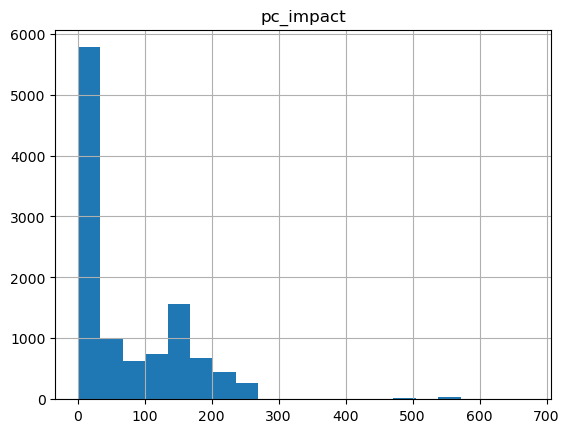

In [46]:
merged_df.hist(column='pc_impact',bins=20)

In [47]:
#Based on the values of pc_impact we create a new column pcif that assigns labels based on the value of pc_impact

merged_df['pcif'] = merged_df['pc_impact'].apply(lambda x: 
                                                'very high' if x > 300
                                                else 'high' if 150 <= x <= 300
                                                else 'medium' if 90 <= x < 150
                                                else 'low')
df = merged_df
df = df.drop(['Production Companies','No. of Movies','Total Domestic Box Office', 'Total Worldwide Box Office'], axis=1)
df['production_companies'] = df['production_companies'].replace('', 'unknown')
df			

,id,title,genres,original_language,popularity,production_companies,release_year,runtime,status,vote_average,vote_count,credits,keywords,revenue_budget_ratio,pc_impact,pcif
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,45.0,warner bros,2023,116.0,Released,7.079,4.417647,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,1.987829,168.861226,high
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,45.0,screen gems,2023,103.0,Released,7.433,1.763823,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,3.648656,64.424137,low
2,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,45.0,paramount,2023,127.0,Released,7.340,3.259026,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,1.987829,151.693412,high
3,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,45.0,marvel,2023,125.0,Released,6.507,9.097441,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...,1.987829,551.288770,very high
4,677179,Creed III,Drama-Action,en,45.0,metro-goldwyn-mayer,2023,116.0,Released,7.262,3.653864,Michael B. Jordan-Tessa Thompson-Jonathan Majo...,philadelphia pennsylvania-husband wife relatio...,1.987829,102.345331,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11185,576819,Active Shooter,Documentary-Crime,en,0.6,unknown,2017,90.0,Released,3.350,0.000000,Connor Patrick Griffin-Kristina Anderson-Dave ...,unknown,0.677596,31.298209,low
11186,512178,10 INSANE World Records OF ALL TIME,unknown,en,0.6,unknown,2008,8.0,Released,3.350,0.000000,unknown,unknown,0.677596,31.298209,low
11187,546976,Woman's Enemy,Comedy,fa,0.6,unknown,2017,90.0,Released,6.500,0.003236,Sam Derakhshani-Bahare Kianafshar-Elnaz Habibi...,unknown,0.677596,31.298209,low
11188,506977,100W Bulb,Drama-Crime,fa,0.6,unknown,2014,90.0,Released,3.350,0.000000,Mohsen Tanabande-Sare Bayat-Masoud Karamati-Po...,unknown,0.677596,31.298209,low


*<h5>Till this point, we have extracted meaning from production companies and added two new features pc_impact which is the average earning of the one major production company (in millions) and pcif which is the production companies impact factor based on pc_impact.</h5>*

**<h3>Cleaning genre and mapping it to its Impact</h3>**

In [48]:
df['genres'] = df['genres'].str.split('-')
df['genres'] = df['genres'].apply(lambda x: [genre.strip().title() for genre in x])

In [49]:
def get_genre(genres):
    if len(genres) > 3:
        return 'multiple'
    elif len(genres) > 0:
        return genres[0]
    else:
        return ''

df['genres'] = df['genres'].apply(get_genre)

In [50]:
for column in df.columns:
    if column == 'genres':
        unique_values = df[column].unique()
        print(f"Unique values in {column}: {unique_values}")


Unique values in genres: ['Action' 'Horror' 'Drama' 'multiple' 'Fantasy' 'History'
 'Science Fiction' 'Comedy' 'War' 'Animation' 'Thriller' 'Adventure'
 'Crime' 'Mystery' 'Romance' 'Music' 'Family' 'Western' 'Documentary'
 'Unknown' 'Tv Movie']


In [51]:
genre_impact = {'high':['Action', 'Adventure', 'Drama', 'Comedy', 'Science Fiction', 'Horror'],'medium':['Animation', 'Thriller', 'Crime', 'Romance','Family', 'Documentary', 'Fantasy'], 'low':['History', 'War', 'Mystery', 'Music', 'Western', 'Tv Movie', 'Unknown', 'multiple']}

df['gif'] = df['genres'].apply(lambda x: next((k for k, v in genre_impact.items() if any(g in str(x).split(', ') for g in v)), 'low'))

df


,id,title,genres,original_language,popularity,production_companies,release_year,runtime,status,vote_average,vote_count,credits,keywords,revenue_budget_ratio,pc_impact,pcif,gif
0,615656,Meg 2: The Trench,Action,en,45.0,warner bros,2023,116.0,Released,7.079,4.417647,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,1.987829,168.861226,high,high
1,758323,The Pope's Exorcist,Horror,en,45.0,screen gems,2023,103.0,Released,7.433,1.763823,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,3.648656,64.424137,low,high
2,667538,Transformers: Rise of the Beasts,Action,en,45.0,paramount,2023,127.0,Released,7.340,3.259026,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,1.987829,151.693412,high,high
3,640146,Ant-Man and the Wasp: Quantumania,Action,en,45.0,marvel,2023,125.0,Released,6.507,9.097441,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...,1.987829,551.288770,very high,high
4,677179,Creed III,Drama,en,45.0,metro-goldwyn-mayer,2023,116.0,Released,7.262,3.653864,Michael B. Jordan-Tessa Thompson-Jonathan Majo...,philadelphia pennsylvania-husband wife relatio...,1.987829,102.345331,medium,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11185,576819,Active Shooter,Documentary,en,0.6,unknown,2017,90.0,Released,3.350,0.000000,Connor Patrick Griffin-Kristina Anderson-Dave ...,unknown,0.677596,31.298209,low,medium
11186,512178,10 INSANE World Records OF ALL TIME,Unknown,en,0.6,unknown,2008,8.0,Released,3.350,0.000000,unknown,unknown,0.677596,31.298209,low,low
11187,546976,Woman's Enemy,Comedy,fa,0.6,unknown,2017,90.0,Released,6.500,0.003236,Sam Derakhshani-Bahare Kianafshar-Elnaz Habibi...,unknown,0.677596,31.298209,low,high
11188,506977,100W Bulb,Drama,fa,0.6,unknown,2014,90.0,Released,3.350,0.000000,Mohsen Tanabande-Sare Bayat-Masoud Karamati-Po...,unknown,0.677596,31.298209,low,high


**<h3>Adjusting Runtime</h3>**

In [52]:
#Setting lower bound of runtime to 75 minutes and upper bound to 210
df['runtime'] = df['runtime'].apply(lambda x: 75 if x < 75 else x)
df['runtime'] = df['runtime'].apply(lambda x: 210 if x > 210 else x)

#Applying MinMax Scaling to 'runtime'.
print('runtime')
print("VALUES BEFORE SCALING:")
print(df['runtime'])
mm_scaler1 = MinMaxScaler(feature_range=(0, 10))

vals_vc = np.array(df['runtime'].tolist()).reshape(-1,1)
vals_vc_scaled = mm_scaler1.fit_transform(vals_vc)

#Put in data frame
df['runtime'] = vals_vc_scaled
print("VALUES AFTER SCALING:")
print(df['runtime'])

runtime
VALUES BEFORE SCALING:
0        116.0
1        103.0
2        127.0
3        125.0
4        116.0
         ...  
11185     90.0
11186     75.0
11187     90.0
11188     90.0
11189     93.0
Name: runtime, Length: 11190, dtype: float64
VALUES AFTER SCALING:
0        3.037037
1        2.074074
2        3.851852
3        3.703704
4        3.037037
           ...   
11185    1.111111
11186    0.000000
11187    1.111111
11188    1.111111
11189    1.333333
Name: runtime, Length: 11190, dtype: float64


**<h3>Extracting Information from Credits</h3>**

In [53]:
unknown_count = (df['credits'] == 'unknown').sum()
unknown_count

437

In [54]:
df['credits'] = df['credits'].apply(standardize_company_name)

In [55]:
#Read top actors file from imdb
dfta = pd.read_csv('top_1000_actors.csv')

In [56]:
dfta['Name'] = dfta['Name'].apply(standardize_company_name)

In [57]:
dfta.head(5)

,Name
0,robert de niro
1,jack nicholson
2,marlon brando
3,denzel washington
4,katharine hepburn


In [58]:
# Find rows where the 'Name' column in dfta contains '-'
rows_dashed = dfta[dfta['Name'].str.contains('-')]
# Extract the 'Production Companies' values from the selected rows
actor_names = rows_dashed['Name'].tolist()

# Convert the list to a NumPy array
actors_array = np.array(actor_names)
#This is an array containing the names of all actors that have a '-' in their name.



In [59]:
#Applying the fucntion to convert credits into an array
df['credits'] = df['credits'].apply(lambda x: split_company_names(x, actors_array))

In [60]:
df['matched_actors'] = ''

# Iterate through the rows of df
for index, row in df.iterrows():
    # Split the 'credits' column into a list
    credits = row['credits']

    credits = [c.strip() for c in credits]
    
    
    # Iterate through the 'name' column in dfta
    for name in dfta['Name']:
        # Check if the actor name is present in the actors list
        if name in credits:
            tba = name
    
   
    df.at[index, 'matched_actors'] = tba
    tba = "unknown"

In [61]:
# Creating a new boolean feature that tells whether a movie contains a popular actor or not
df['pop_actor'] = ~df['matched_actors'].str.contains('unknown')
df = df.drop(['credits', 'status', 'keywords', 'matched_actors','id'], axis=1) #Dropping unnecessary values

In [62]:
# Normalizing by applying decimal scaling on 'pc_impact' and 'popularity'
df['pc_impact'] = df['pc_impact'] / 100 
df['popularity'] = df['popularity'] / 10

**<h3>Converting the revenue-budget ratio to a binary label</h3>**

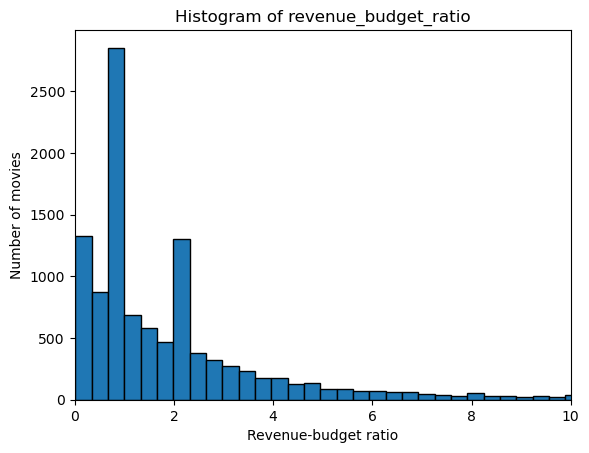

In [63]:
plt.hist(df['revenue_budget_ratio'], bins=500, edgecolor='black')

# Add labels and title
plt.xlabel('Revenue-budget ratio')
plt.ylabel('Number of movies')
plt.title('Histogram of revenue_budget_ratio')
plt.xlim(0, 10)

# Show the plot
plt.show()

<em>This histogram shows a general distribution of the revenue budget ratio. Generally speaking, movies which make approximately twice as much as their budget are considered successful. To assign labels, we look at a zoomed in version of this histogram to find movies whose revenue budget ratio is very close to 2.</em>

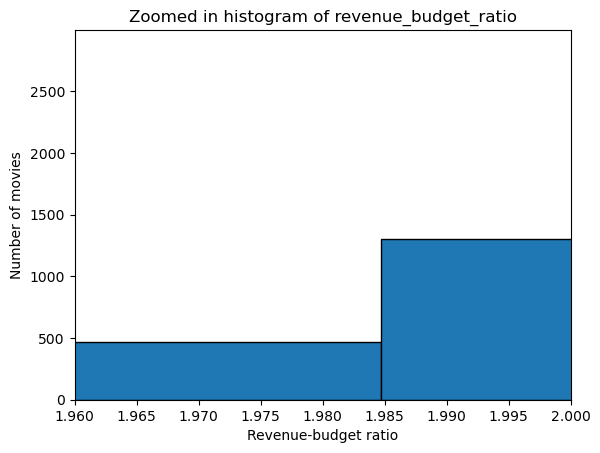

In [64]:
plt.hist(df['revenue_budget_ratio'], bins=500, edgecolor='black')

# Add labels and title
plt.xlabel('Revenue-budget ratio')
plt.ylabel('Number of movies')
plt.title('Zoomed in histogram of revenue_budget_ratio')
plt.xlim(1.96, 2.0)

# Show the plot
plt.show()

<em> It can be seen that there's a good number of movies starting at slightly less than 1.985 that can be considered successful since their revenue-budget ratio is very close to 2. Therefore, we take 1.98 as a threshold for distinction between the classes. Movies whose revenue-budget ratio is more than 1.98 will be considered successful and unsuccessful otherwise.</em>

In [65]:
# Create a new column 'success_pot'
df['success_pot'] = 1
df.loc[df['revenue_budget_ratio'] <= 1.98, 'success_pot'] = 0



In [66]:
df = df.drop('revenue_budget_ratio', axis=1)

In [67]:
df.to_csv('movies_prepr_featureExt.csv', index=False)